In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers
import keras
 
%matplotlib inline
tf.random.set_seed(42)

2024-01-09 14:52:01.125636: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-09 14:52:01.152727: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-09 14:52:01.310935: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-09 14:52:01.312723: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-09 14:52:02.191494: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
#import plotly.graph_objects as go
import tensorflow as tf
#import tensorflow_addons as tfa

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
#from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from keras import Sequential
from keras import layers
from keras.models import Model
from keras.layers import LSTM, BatchNormalization, Dropout, Dense, Flatten, Conv1D
from keras.layers import MaxPooling1D, GRU, Input,Masking, Concatenate, dot
from keras.optimizers import Adam, SGD
from keras.losses import MeanAbsoluteError
from keras.metrics import RootMeanSquaredError
from keras.callbacks import EarlyStopping
from keras.callbacks import LearningRateScheduler
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_excel(r"~/Downloads/BID_RA_data/BID_RA_19_20.xlsx")

In [4]:
df.dtypes

Order ID                                  int64
Order Date                       datetime64[ns]
FY_OrderDate                             object
Month_Name_OrderDate                     object
Purchase Mode                            object
Bid start date                   datetime64[ns]
Bid end date                     datetime64[ns]
HOD ID                                   object
Seller ID                                object
Order_Quarter                            object
Order MSME Verified                      object
MSME verfied gender wise                 object
MSME verified social category            object
Startup verfied                          object
Sub Category ID                          object
Expected delivery date           datetime64[ns]
Shipment received date                   object
Order Qty                                 int64
Order value                             float64
Consignment ID                            int64
GeM Invoice Number                      

In [5]:
df1 = df.drop(df.columns[[0, 7, 19, 20, 21, 31]], axis=1)

In [6]:
df1.dtypes

Order Date                       datetime64[ns]
FY_OrderDate                             object
Month_Name_OrderDate                     object
Purchase Mode                            object
Bid start date                   datetime64[ns]
Bid end date                     datetime64[ns]
Seller ID                                object
Order_Quarter                            object
Order MSME Verified                      object
MSME verfied gender wise                 object
MSME verified social category            object
Startup verfied                          object
Sub Category ID                          object
Expected delivery date           datetime64[ns]
Shipment received date                   object
Order Qty                                 int64
Order value                             float64
Shipment Quantity Received                int64
Shipment Quantity Rejected                int64
Shipment Quantity Accepted                int64
CRAC amount                             

In [7]:
df1["Seller ID"].value_counts()

Seller ID
COMP7                                   693703
COMP14768                               116971
COMP1574                                 61193
COMP22181                                59780
COMP11321                                29412
                                         ...  
COMP1844                                     1
COMP4971                                     1
COMP10E4D2FCFB9A7A5674F5AAD5150B4EC9         1
COMP8794                                     1
NCOMP30968                                   1
Name: count, Length: 4549, dtype: int64

In [8]:
df1["price"] = df1["Order value"]/df1["Order Qty"]

In [9]:
import datetime
from datetime import datetime as dt

In [10]:
df1["Time taken to deliver"] = (df1["Expected delivery date"] - df1["Order Date"]).dt.days

In [11]:
df1.drop(columns=["Month_Name_OrderDate", "Order_Quarter", "Invoice Date","CRAC date", "Payment Date"], inplace=True)

In [12]:
columns_to_encode = ["Purchase Mode", "MSME verfied gender wise", "Order MSME Verified", "Startup verfied"]

In [13]:
le = LabelEncoder()

In [14]:
for column in columns_to_encode:
       df1[column+'_encoded'] = le.fit_transform(df1[column])

In [15]:
df1 = df1.drop(columns=["Purchase Mode", "MSME verfied gender wise", "Order MSME Verified", "Startup verfied"])

In [16]:
df1 = df1.drop(columns=["FY_OrderDate", "Bid start date", "Bid end date"])

In [17]:
df1["Payment Type"+'_encoded'] = le.fit_transform(df1["Payment Type"])

In [18]:
df1["MSME verified social category"+'_encoded'] = le.fit_transform(df1["MSME verified social category"])

In [19]:
df1 = df1.drop(columns=["MSME verified social category", "Payment Type"])

In [20]:
df1.columns

Index(['Order Date', 'Seller ID', 'Sub Category ID', 'Expected delivery date',
       'Shipment received date', 'Order Qty', 'Order value',
       'Shipment Quantity Received', 'Shipment Quantity Rejected',
       'Shipment Quantity Accepted', 'CRAC amount', 'Total payments', 'price',
       'Time taken to deliver', 'Purchase Mode_encoded',
       'MSME verfied gender wise_encoded', 'Order MSME Verified_encoded',
       'Startup verfied_encoded', 'Payment Type_encoded',
       'MSME verified social category_encoded'],
      dtype='object')

In [21]:
df1 = df1.drop(columns=["Order Date", "Expected delivery date", "Shipment received date"])

In [22]:
df1 = df1.drop(columns=['Seller ID'])

In [23]:
df1["Sub Category ID"+'_encoded'] = le.fit_transform(df1["Sub Category ID"])

In [24]:
df1 = df1.drop(columns=['Sub Category ID'])

In [30]:
df1.columns

Index(['Order Qty', 'Order value', 'Shipment Quantity Received',
       'Shipment Quantity Rejected', 'Shipment Quantity Accepted',
       'CRAC amount', 'Total payments', 'price', 'Time taken to deliver',
       'Purchase Mode_encoded', 'MSME verfied gender wise_encoded',
       'Order MSME Verified_encoded', 'Startup verfied_encoded',
       'Payment Type_encoded', 'MSME verified social category_encoded',
       'Sub Category ID_encoded'],
      dtype='object')

In [31]:
df1["Sub Category ID_encoded"].value_counts()

Sub Category ID_encoded
593     811482
147      89195
139      61019
41        8535
466       7739
         ...  
1016         1
928          1
1093         1
59           1
620          1
Name: count, Length: 1352, dtype: int64

In [32]:
df2=df1[df1["Sub Category ID_encoded"]==147]

In [33]:
df2.shape

(89195, 16)

In [34]:
df3=df1[df1["Sub Category ID_encoded"]==593]

In [35]:
df3.shape

(811482, 16)

In [36]:
X = df2.drop(columns=['Time taken to deliver'])
y = df2['Time taken to deliver']

In [26]:
X = df1.drop(columns=['Time taken to deliver'])
y = df1['Time taken to deliver']

In [37]:
X.columns

Index(['Order Qty', 'Order value', 'Shipment Quantity Received',
       'Shipment Quantity Rejected', 'Shipment Quantity Accepted',
       'CRAC amount', 'Total payments', 'price', 'Purchase Mode_encoded',
       'MSME verfied gender wise_encoded', 'Order MSME Verified_encoded',
       'Startup verfied_encoded', 'Payment Type_encoded',
       'MSME verified social category_encoded', 'Sub Category ID_encoded'],
      dtype='object')

In [38]:
X.shape

(89195, 15)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
X_train.head()

,Order Qty,Order value,Shipment Quantity Received,Shipment Quantity Rejected,Shipment Quantity Accepted,CRAC amount,Total payments,price,Purchase Mode_encoded,MSME verfied gender wise_encoded,Order MSME Verified_encoded,Startup verfied_encoded,Payment Type_encoded,MSME verified social category_encoded,Sub Category ID_encoded
127949,156000,523380000.0,562,0,562,1885510.0,2328370.0,3355.0,0,0,0,0,3,0,147
139486,156000,523380000.0,689,0,689,2311595.0,2013000.0,3355.0,0,0,0,0,3,0,147
71415,156000,523380000.0,321,0,321,1076955.0,2103585.0,3355.0,0,0,0,0,3,0,147
157336,104000,348920000.0,503,0,503,1687565.0,1643950.0,3355.0,0,0,1,0,1,0,147
76488,156000,523380000.0,675,0,675,2264625.0,2348500.0,3355.0,0,0,0,0,3,0,147


In [41]:
X_train_bil, y_train_bil = np.array(X_train), np.array(y_train)
X_test_bil, y_test_bil = np.array(X_test), np.array(y_test)
#X_train_bil = X_train_bil.reshape((X_train_bil.shape[0], 1, X_train_bil.shape[1]))
#X_test_bil = X_test_bil.reshape((X_test_bil.shape[0], 1, X_test_bil.shape[1]))
print(X_train_bil.shape, y_train_bil.shape, X_test_bil.shape, y_test_bil.shape)

(71356, 15) (71356,) (17839, 15) (17839,)


In [42]:
X_train.dtypes

Order Qty                                  int64
Order value                              float64
Shipment Quantity Received                 int64
Shipment Quantity Rejected                 int64
Shipment Quantity Accepted                 int64
CRAC amount                              float64
Total payments                           float64
price                                    float64
Purchase Mode_encoded                      int64
MSME verfied gender wise_encoded           int64
Order MSME Verified_encoded                int64
Startup verfied_encoded                    int64
Payment Type_encoded                       int64
MSME verified social category_encoded      int64
Sub Category ID_encoded                    int64
dtype: object

In [ ]:
## Deep Belief Network with RBMs

In [32]:
# LSTM

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
from keras.layers import RepeatVector
from keras.layers import Bidirectional

In [34]:
def create_model():
  model = Sequential()
  model.add(LSTM(128, activation='relu', return_sequences=True))
  model.add(LSTM(64, activation='relu', return_sequences=False))
  model.add(RepeatVector(7))
  model.add(LSTM(64, activation='relu', return_sequences=True))
  model.add(LSTM(128, activation='relu', return_sequences=True))

  model.add(Bidirectional(LSTM(128, activation='relu',return_sequences=True)))
  model.add(LSTM(64, activation='relu', return_sequences=True))
  model.add(Dropout(0.25))
  model.add(LSTM(64, activation='relu', return_sequences=False))
  model.add(Dropout(0.25))

  model.add(Dense(10,activation='relu'))
  model.add(Dense(1,activation='relu'))
  model.compile(loss='mse', optimizer='adam')
  model.build(input_shape=(1,15,1)) 
  model.summary()
  return model


In [35]:
model_lsauto=create_model()
history = model_lsauto.fit(X_train_bil, y_train_bil, epochs=10, batch_size=128, validation_split=0.3)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (1, 15, 128)              66560     
                                                                 
 lstm_1 (LSTM)               (1, 64)                   49408     
                                                                 
 repeat_vector (RepeatVecto  (1, 7, 64)                0         
 r)                                                              
                                                                 
 lstm_2 (LSTM)               (1, 7, 64)                33024     
                                                                 
 lstm_3 (LSTM)               (1, 7, 128)               98816     
                                                                 
 bidirectional (Bidirection  (1, 7, 256)               263168    
 al)                                                    

In [36]:
y_pred_lsauto = model_lsauto.predict(X_test_bil)

6554/6554 [==============================] - 55s 8ms/step


In [36]:
from sklearn.metrics import mean_absolute_error
from keras.layers import Bidirectional
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [38]:
mse_lsauto_seen = mean_squared_error(y_test, y_pred_lsauto)
rmse_lsauto_seen = np.sqrt(mse_lsauto_seen)
print(f"Root Mean Squared Error: {rmse_lsauto_seen}")
print(f"Mean Squared Error: {mse_lsauto_seen}")

Root Mean Squared Error: 42.81820364928231
Mean Squared Error: 1833.3985637514127


In [39]:
# Create a DataFrame of Real and Predicted values
prices_lsauto_seen = pd.DataFrame({
    "Real": y_test.ravel(),
    "Predicted": y_pred_lsauto.ravel()
}, index = df1.index[-len(y_test): ]) 
prices_lsauto_seen.head()

,Real,Predicted
838852,30,0.0
838853,30,0.0
838854,30,0.0
838855,45,0.0
838856,30,0.0


In [ ]:
## Autoencoder on unseen data

In [60]:
df22 = pd.read_excel(r"~/Downloads/BID_RA_data/BID_RA_22_23.xlsx")

In [86]:
df22_1 = df22.drop(df22.columns[[0, 7, 19, 20, 21, 31 ]], axis=1)
df22_1["price"] = df22_1["Order value"]/df22_1["Order Qty"]
df22_1["Time taken to deliver"] = (df22_1["Expected delivery date"] - df22_1["Order Date"]).dt.days
df22_1.drop(columns=["Month_Name_OrderDate", "Order_Quarter", "Invoice Date","CRAC date", "Payment Date"], inplace=True)
for column in columns_to_encode:
       df22_1[column+'_encoded'] = le.fit_transform(df22_1[column])
df22_1 = df22_1.drop(columns=["FY_OrderDate", "Bid start date", "Bid end date"])
df22_1["Payment Type"+'_encoded'] = le.fit_transform(df22_1["Payment Type"])
df22_1["MSME verified social category"+'_encoded'] = le.fit_transform(df22_1["MSME verified social category"])
df22_1["Sub Category ID"+'_encoded'] = le.fit_transform(df22_1["Sub Category ID"])
df22_1= df22_1.drop(columns=['Seller ID'])
df22_1 = df22_1.drop(columns=["MSME verified social category", "Payment Type"])
df22_1 = df22_1.drop(columns=["Order Date", "Expected delivery date", "Shipment received date"])
df22_1 = df22_1.drop(columns=["Sub Category ID"])
df22_1 = df22_1.drop(columns=["Purchase Mode", "Order MSME Verified", "MSME verfied gender wise", "Startup verfied"])
df22_1["Sub Category ID_encoded"].value_counts()
df22_1=df22_1[df22_1["Sub Category ID_encoded"]==1379]
df22_1.shape
I = df22_1.drop(columns=['Time taken to deliver'])
j = df22_1['Time taken to deliver']
I_train, I_test, j_train, j_test = train_test_split(I, j, test_size=0.2)
I_train_bil, j_train_bil = np.array(I_train), np.array(j_train)
I_test_bil, j_test_bil = np.array(I_test), np.array(j_test)

print(I_train_bil.shape, j_train_bil.shape, I_test_bil.shape, j_test_bil.shape)

(106588, 15) (106588,) (26648, 15) (26648,)


In [66]:
j_pred_lsauto = model_lsauto.predict(I_test_bil)

NameError: name 'model_lsauto' is not defined

In [46]:
mse_lsauto_unseen = mean_squared_error(j_test, j_pred_lsauto)
rmse_lsauto_unseen = np.sqrt(mse_lsauto_unseen)
print(f"Root Mean Squared Error: {rmse_lsauto_unseen}")
print(f"Mean Squared Error: {mse_lsauto_unseen}")

Root Mean Squared Error: 246.53051849241626
Mean Squared Error: 60777.2965481396


In [48]:
# Create a DataFrame of Real and Predicted values
prices_lsauto_seen = pd.DataFrame({
    "Real": j_test.ravel(),
    "Predicted": j_pred_lsauto.ravel()
}, index = df1.index[-len(y_test): ]) 
prices_lsauto_seen.head()

,Real,Predicted
838852,214,0.0
838853,214,0.0
838854,214,0.0
838855,326,0.0
838856,367,0.0


In [ ]:
### GRU MOdel

In [38]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 630.4 kB/s eta 0:00:00 kB/s eta 0:00:01:01
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56438 sha256=83f71a5aaa25598826b48c5acc73511f01b1c8eb9af1b5770a7ea565c044ed88
  Stored in directory: /home/amit/.cache/pip/wheels/55/8b/e7/a23fd46c709c21e3e6fcb55978d88b018f80d54018459978c3
Successfully built np_utils

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [54]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Reshape
from keras.layers import Conv1D, MaxPooling1D, LeakyReLU
import np_utils
from keras.layers import GRU
model_GRU = Sequential()

model_GRU.add(GRU(units=50, input_shape=(15,1),return_sequences=False))
model_GRU.add(Activation('tanh'))
model_GRU.add(Dropout(0.3))
model_GRU.add(Dense(1))
model_GRU.add(Activation('relu'))
model_GRU.compile(loss='mse', optimizer='adam', metrics = ('MAPE'))

In [55]:
model_GRU.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 50)                7950      
                                                                 
 activation_2 (Activation)   (None, 50)                0         
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
 activation_3 (Activation)   (None, 1)                 0         
                                                                 
Total params: 8001 (31.25 KB)
Trainable params: 8001 (31.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
history_GRU = model_GRU.fit(X_train_bil, y_train_bil, validation_data=(X_test_bil, y_test_bil), batch_size = 128, epochs = 60)

Epoch 1/60
558/558 [==============================] - 4s 7ms/step - loss: 64.4054 - MAPE: 7.1125 - val_loss: 0.8568 - val_MAPE: 0.8500
Epoch 2/60
558/558 [==============================] - 4s 7ms/step - loss: 64.3384 - MAPE: 7.1163 - val_loss: 0.8431 - val_MAPE: 0.8396
Epoch 3/60
558/558 [==============================] - 4s 7ms/step - loss: 64.4826 - MAPE: 7.1169 - val_loss: 0.8464 - val_MAPE: 0.8421
Epoch 4/60
558/558 [==============================] - 4s 7ms/step - loss: 62.9605 - MAPE: 7.0468 - val_loss: 0.9332 - val_MAPE: 0.9058
Epoch 5/60
558/558 [==============================] - 4s 7ms/step - loss: 63.0143 - MAPE: 7.0357 - val_loss: 0.9066 - val_MAPE: 0.8868
Epoch 6/60
558/558 [==============================] - 4s 7ms/step - loss: 62.9161 - MAPE: 7.0491 - val_loss: 0.7427 - val_MAPE: 0.7588
Epoch 7/60
558/558 [==============================] - 4s 7ms/step - loss: 61.9213 - MAPE: 6.9873 - val_loss: 0.6073 - val_MAPE: 0.6329
Epoch 8/60
558/558 [==============================] - 4

In [78]:
pred_GRU = model_GRU.predict(X_test_bil)

558/558 [==============================] - 1s 2ms/step


In [79]:
pred_GRU

array([[89.61144],
       [89.61144],
       [89.61144],
       ...,
       [89.61144],
       [89.61144],
       [89.61144]], dtype=float32)

In [80]:
y_test_bil

array([90, 90, 90, ..., 90, 90, 90])

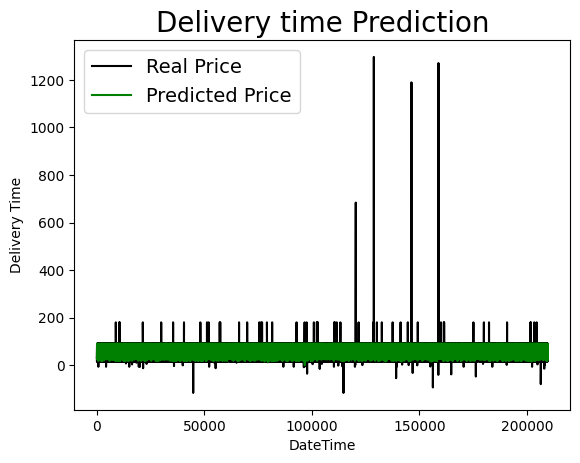

In [60]:
plt.plot(y_test_bil, color = 'black', label = 'Real Price')
plt.plot(pred_GRU, color = 'green', label = 'Predicted Price')
plt.title('Delivery time Prediction', fontsize=20)
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('DateTime')
plt.ylabel('Delivery Time')
plt.legend(fontsize=14)
plt.show()

In [59]:
mse_gru_seen = mean_squared_error(y_test, pred_GRU)
rmse_gru_seen = np.sqrt(mse_gru_seen)
print(f"Root Mean Squared Error: {rmse_gru_seen}")
print(f"Mean Squared Error: {mse_gru_seen}")

Root Mean Squared Error: 0.9666798319187409
Mean Squared Error: 0.9344698974384451


In [81]:
# Create a DataFrame of Real and Predicted values
prices_gru_seen = pd.DataFrame({
    "Real": y_test.ravel(),
    "Predicted": pred_GRU.ravel()
}, index = df1.index[-len(y_test): ]) 
prices_gru_seen.head()

,Real,Predicted
1030726,90,89.611443
1030727,90,89.611443
1030728,90,89.611443
1030729,90,89.611443
1030730,90,89.611443


In [52]:
prices_gru_seen.tail()

,Real,Predicted
1048560,90,89.413689
1048561,90,89.413689
1048562,90,89.413689
1048563,90,89.413689
1048564,90,89.413689


In [ ]:
## On Unseen Data

In [65]:
j_test

9251      365
439407    214
944475    214
441525    214
873204    214
         ... 
208891    238
299924    546
904478    214
658424    214
456894    214
Name: Time taken to deliver, Length: 209713, dtype: int64

In [87]:
j_pred_gru = model_GRU.predict(I_test_bil)

833/833 [==============================] - 1s 2ms/step


In [88]:
mse_gru_unseen = mean_squared_error(j_test, j_pred_gru)
rmse_gru_unseen = np.sqrt(mse_gru_unseen)
print(f"Root Mean Squared Error: {rmse_gru_unseen}")
print(f"Mean Squared Error: {mse_gru_unseen}")

Root Mean Squared Error: 254.8750952413254
Mean Squared Error: 64961.314174274696


In [ ]:
#@# 

In [1]:
# Create a DataFrame of Real and Predicted values
prices_gru_unseen = pd.DataFrame({
    "Real": j_test.ravel(),
    "Predicted": j_pred_gru.ravel()
}, index = df1.index[-len(j_test): ]) 
#prices_gru_unseen.head()
prices_gru_unseen.tail()

NameError: name 'pd' is not defined

In [66]:
mse_gru_unseen = mean_squared_error(j_test, j_pred_gru)
rmse_gru_unseen = np.sqrt(mse_gru_unseen)
print(f"Root Mean Squared Error: {rmse_gru_unseen}")
print(f"Mean Squared Error: {mse_gru_unseen}")

Root Mean Squared Error: 208.39893243391418
Mean Squared Error: 43430.11503959513


In [69]:
# Create a DataFrame of Real and Predicted values
prices_gru_unseen = pd.DataFrame({
    "Real": j_test.ravel(),
    "Predicted": j_pred_gru.ravel()
}, index = df1.index[-len(j_test): ]) 
prices_gru_unseen.head()

,Real,Predicted
838852,365,59.773228
838853,214,30.246544
838854,214,39.159740
838855,214,39.159740
838856,214,33.590851


In [ ]:
## CATBOOST

In [44]:
from catboost import CatBoostRegressor
model_cb = CatBoostRegressor(iterations=1000,  # Adjust the number of iterations as needed
                             learning_rate=0.01,  # Adjust the learning rate as needed
                             depth=6,  # Adjust the depth of the trees
                             loss_function='RMSE',  # Specify the loss function for regression
                             random_seed=42,
                            verbose=100)
model_cb.fit(X_train_bil, y_train_bil)
y_pred_cb = model_cb.predict(X_test_bil)
from sklearn.metrics import mean_squared_error
mse_cat = mean_squared_error(y_test_bil, y_pred_cb)
rmse_cat = np.sqrt(mse_cat)
print(f"Root Mean Squared Error: {rmse_cat}")
print(f"Mean Squared Error: {mse_cat}")

0:	learn: 18.8700194	total: 39.7ms	remaining: 39.7s
100:	learn: 8.2571147	total: 4.02s	remaining: 35.8s
200:	learn: 5.1315569	total: 8.21s	remaining: 32.7s
300:	learn: 4.2895311	total: 12.1s	remaining: 28s
400:	learn: 3.9599494	total: 16.2s	remaining: 24.1s
500:	learn: 3.7768485	total: 20.2s	remaining: 20.1s
600:	learn: 3.6660763	total: 23.7s	remaining: 15.7s
700:	learn: 3.5673757	total: 27.1s	remaining: 11.6s
800:	learn: 3.4840146	total: 30.6s	remaining: 7.59s
900:	learn: 3.3908071	total: 34.4s	remaining: 3.78s
999:	learn: 3.3079676	total: 38s	remaining: 0us
Root Mean Squared Error: 4.055042401745577
Mean Squared Error: 16.443368879954537


In [45]:
# Create a DataFrame of Real and Predicted values
prices_catb_seen = pd.DataFrame({
    "Real": y_test.ravel(),
    "Predicted": y_pred_cb.ravel()
}, index = df1.index[-len(y_test): ]) 
prices_catb_seen.head()

,Real,Predicted
838852,28,28.143553
838853,30,30.006564
838854,30,30.025324
838855,30,30.006564
838856,30,29.995327


In [ ]:
df22 = pd.read_excel(r"~/Downloads/BID_RA_data/BID_RA_22_23.xlsx")

In [ ]:
df22_1 = df22.drop(df22.columns[[0, 7, 19, 20, 21, 31 ]], axis=1)
df22_1["price"] = df22_1["Order value"]/df22_1["Order Qty"]
df22_1["Time taken to deliver"] = (df22_1["Expected delivery date"] - df22_1["Order Date"]).dt.days
df22_1.drop(columns=["Month_Name_OrderDate", "Order_Quarter", "Invoice Date","CRAC date", "Payment Date"], inplace=True)
for column in columns_to_encode:
       df22_1[column+'_encoded'] = le.fit_transform(df22_1[column])
df22_1 = df22_1.drop(columns=["FY_OrderDate", "Bid start date", "Bid end date"])
df22_1["Payment Type"+'_encoded'] = le.fit_transform(df22_1["Payment Type"])
df22_1["MSME verified social category"+'_encoded'] = le.fit_transform(df22_1["MSME verified social category"])
df22_1["Sub Category ID"+'_encoded'] = le.fit_transform(df22_1["Sub Category ID"])
df22_1= df22_1.drop(columns=['Seller ID'])
df22_1 = df22_1.drop(columns=["MSME verified social category", "Payment Type"])
df22_1 = df22_1.drop(columns=["Order Date", "Expected delivery date", "Shipment received date"])
df22_1 = df22_1.drop(columns=["Sub Category ID"])
df22_1 = df22_1.drop(columns=["Purchase Mode", "Order MSME Verified", "MSME verfied gender wise", "Startup verfied"])
I = df22_1.drop(columns=['Time taken to deliver'])
j = df22_1['Time taken to deliver']
I_train, I_test, j_train, j_test = train_test_split(I, j, test_size=0.2)
I_train_bil, j_train_bil = np.array(I_train), np.array(j_train)
I_test_bil, j_test_bil = np.array(I_test), np.array(j_test)

print(I_train_bil.shape, j_train_bil.shape, I_test_bil.shape, j_test_bil.shape)

In [ ]:
j_pred_cb = model_cb.predict(j_test_bil)

In [ ]:

from sklearn.metrics import mean_squared_error
mse_cat_uns = mean_squared_error(j_test_bil, j_pred_cb)
rmse_cat_uns = np.sqrt(mse_cat_uns)
print(f"Root Mean Squared Error: {rmse_cat_uns}")
print(f"Mean Squared Error: {mse_cat_uns}")

In [32]:
from keras.layers import RepeatVector
from keras.layers import Bidirectional

In [37]:
def create_model():
  model = Sequential()
  model.add(LSTM(128, activation='relu', return_sequences=True))
  model.add(LSTM(64, activation='relu', return_sequences=False))
  model.add(RepeatVector(7))
  model.add(LSTM(64, activation='relu', return_sequences=True))
  model.add(LSTM(128, activation='relu', return_sequences=True))

  model.add(Bidirectional(LSTM(128, activation='relu',return_sequences=True)))
  model.add(LSTM(64, activation='relu', return_sequences=True))
  model.add(Dropout(0.25))
  model.add(LSTM(64, activation='relu', return_sequences=False))
  model.add(Dropout(0.25))

  model.add(Dense(10,activation='relu'))
  model.add(Dense(1,activation='relu'))
  model.compile(loss='mse', optimizer='adam')
  model.build(input_shape=(1,15,1)) 
  model.summary()
  return model

In [39]:
model_lsauto=create_model()
history = model_lsauto.fit(X_train_bil, y_train_bil, epochs=10, batch_size=128, validation_split=0.3)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (1, 15, 128)              66560     
                                                                 
 lstm_1 (LSTM)               (1, 64)                   49408     
                                                                 
 repeat_vector (RepeatVecto  (1, 7, 64)                0         
 r)                                                              
                                                                 
 lstm_2 (LSTM)               (1, 7, 64)                33024     
                                                                 
 lstm_3 (LSTM)               (1, 7, 128)               98816     
                                                                 
 bidirectional (Bidirection  (1, 7, 256)               263168    
 al)                                                    

In [41]:
y_pred_lsauto = model_lsauto.predict(X_test_bil)

6554/6554 [==============================] - 54s 8ms/step


In [42]:
from sklearn.metrics import mean_absolute_error
from keras.layers import Bidirectional
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [43]:
mse_lsauto_seen = mean_squared_error(y_test, y_pred_lsauto)
rmse_lsauto_seen = np.sqrt(mse_lsauto_seen)
print(f"Root Mean Squared Error: {rmse_lsauto_seen}")
print(f"Mean Squared Error: {mse_lsauto_seen}")

Root Mean Squared Error: 42.75912658993916
Mean Squared Error: 1828.3429067344418


In [45]:
# Create a DataFrame of Real and Predicted values
prices_lsauto_seen = pd.DataFrame({
    "Real": y_test.ravel(),
    "Predicted": y_pred_lsauto.ravel()
}, index = df1.index[-len(y_test): ]) 
prices_lsauto_seen.head()

,Real,Predicted
838852,30,0.0
838853,45,0.0
838854,30,0.0
838855,45,0.0
838856,28,0.0


In [61]:
## XGBOOST

In [62]:
import xgboost as xgb

In [63]:
# Create an XGBoost DMatrix for training and testing
dtrain = xgb.DMatrix(X_train_bil, label=y_train_bil)
dtest = xgb.DMatrix(X_test_bil, label=y_test_bil)

In [85]:
# Set hyperparameters
params = {
    'max_depth': 4,
    'eta': 0.1,
    'objective': 'reg:squarederror',  # for regression tasks
    'eval_metric': 'rmse'  # root mean squared error for regression
}

In [86]:
# Train the XGBoost model
num_rounds = 200
model_xgbt = xgb.train(params, dtrain, num_rounds)

In [87]:
y_pred_xgbt = model_xgbt.predict(dtest)

In [88]:
y_pred_xgbt

array([29.99893 , 44.935364, 29.99893 , ..., 45.021267, 29.99893 ,
       29.99893 ], dtype=float32)

In [89]:
# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred_xgbt)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 4.598795262983225


In [90]:
# Create a DataFrame of Real and Predicted values
prices_xgb = pd.DataFrame({
    "Real": y_test.ravel(),
    "Predicted": y_pred_xgbt.ravel()
}, index = df1.index[-len(y_test): ]) 
prices_xgb.head()

,Real,Predicted
838852,30,29.998930
838853,45,44.935364
838854,30,29.998930
838855,30,29.998930
838856,30,29.998930


In [70]:
## Generalization

In [79]:
df22 = pd.read_excel(r"~/Downloads/BID_RA_data/BID_RA_22_23.xlsx")

In [95]:
df22 = pd.read_excel(r"~/Downloads/BID_RA_data/BID_RA_18_19.xlsx")

In [ ]:
df22_1 = df22.drop(df22.columns[[0, 7, 19, 20, 21, 31 ]], axis=1)
df22_1["price"] = df22_1["Order value"]/df22_1["Order Qty"]
df22_1["Time taken to deliver"] = (df22_1["Expected delivery date"] - df22_1["Order Date"]).dt.days
df22_1.drop(columns=["Month_Name_OrderDate", "Order_Quarter", "Invoice Date","CRAC date", "Payment Date"], inplace=True)
for column in columns_to_encode:
       df22_1[column+'_encoded'] = le.fit_transform(df22_1[column])
df22_1 = df22_1.drop(columns=["FY_OrderDate", "Bid start date", "Bid end date"])
df22_1["Payment Type"+'_encoded'] = le.fit_transform(df22_1["Payment Type"])
df22_1["MSME verified social category"+'_encoded'] = le.fit_transform(df22_1["MSME verified social category"])
df22_1["Sub Category ID"+'_encoded'] = le.fit_transform(df22_1["Sub Category ID"])
df22_1= df22_1.drop(columns=['Seller ID'])
df22_1 = df22_1.drop(columns=["MSME verified social category", "Payment Type"])
df22_1 = df22_1.drop(columns=["Order Date", "Expected delivery date", "Shipment received date"])
df22_1 = df22_1.drop(columns=["Sub Category ID"])
df22_1 = df22_1.drop(columns=["Purchase Mode", "Order MSME Verified", "MSME verfied gender wise", "Startup verfied"])
I = df22_1.drop(columns=['Time taken to deliver'])
j = df22_1['Time taken to deliver']
I_train, I_test, j_train, j_test = train_test_split(I, j, test_size=0.2)
I_train_bil, j_train_bil = np.array(I_train), np.array(j_train)
I_test_bil, j_test_bil = np.array(I_test), np.array(j_test)

print(I_train_bil.shape, j_train_bil.shape, I_test_bil.shape, j_test_bil.shape)

In [91]:
dtest_unseen = xgb.DMatrix(I_test_bil, label=j_test_bil)

In [92]:
# Make predictions
j_pred_xgbt = model_xgbt.predict(dtest_unseen)

In [93]:
# Evaluate the model using mean squared error
mse_uns_xgb = mean_squared_error(j_test, j_pred_xgbt)
rmse_uns_xgb = np.sqrt(mse_uns_xgb)
print(f"Root Mean Squared Error: {rmse_uns_xgb}")

Root Mean Squared Error: 209.3791625531153


In [71]:
# Create a DataFrame of Real and Predicted values
prices_xgb_uns = pd.DataFrame({
    "Real": j_test.ravel(),
    "Predicted": j_pred_xgbt.ravel()
}, index = df1.index[-len(j_test): ]) 
prices_xgb_uns.tail()

NameError: name 'j_pred_xgbt' is not defined